![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad2024-12-prediccion-precio-vehiculos).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación librerías
import pandas as pd
import numpy as np

In [6]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [7]:
# Visualización datos de entrenamiento
dataTraining.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [8]:
X = dataTraining.drop('Price', axis=1)
y = dataTraining['Price']

for i in X.columns:
    X[i] = pd.factorize(dataTraining[i])[0]
X
y
dict_trees = {}

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [8]:
lista_features=[X_train.shape[1], int(np.log(X_train.shape[1]))]
lista_rmse=[]
for i in lista_features:
    mod = BaggingRegressor(DecisionTreeRegressor(max_depth=8, random_state=123), n_estimators=10,
                        max_features=i, bootstrap=True, oob_score=True, random_state=42)
    # entrenar el modelo y predecir
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    # calcular el rmse
    lista_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    dict_trees[f'Bagging_features_{round(i,1)}_tree']=mod
    dict_trees[f'Bagging_features_{round(i,1)}_RMSE']=np.sqrt(mean_squared_error(y_test, y_pred))

print("Ensamblaje usando todos los predictores")
print("Features: ", lista_features[0])
print("RMSE: ", lista_rmse[0])
print("\nEnsamblaje usando log(features)")
print("Features: ", lista_features[1])
print("RMSE: ", lista_rmse[1])

Ensamblaje usando todos los predictores
Features:  5
RMSE:  6804.144877437177

Ensamblaje usando log(features)
Features:  1
RMSE:  9483.497439872277


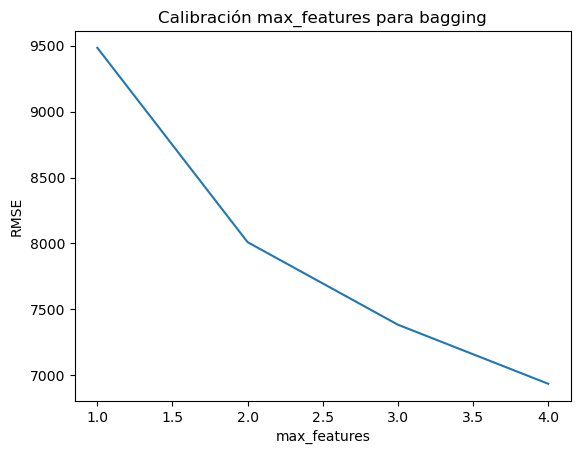

In [9]:
features=np.arange(1,X_train.shape[1]) #numero de features
lista_rmse=[]
for i in features:
    mod = BaggingRegressor(DecisionTreeRegressor(max_depth=8, random_state=123), n_estimators=10,
                        max_features=i, bootstrap=True, oob_score=True, random_state=42)
    # entrenar el modelo y predecir
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    # calcular el rmse
    lista_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    dict_trees[f'Bagging_features_{round(i,1)}_tree']=mod
    dict_trees[f'Bagging_features_{round(i,1)}_RMSE']=np.sqrt(mean_squared_error(y_test, y_pred))
# graficar
plt.plot(features, lista_rmse)  # Aquí usamos mse_scores en lugar de accuracy_scores
plt.xlabel('max_features')
plt.ylabel('RMSE')  # Cambiado de 'Accuracy' a 'MSE' porque estamos tratando con regresión
plt.title('Calibración max_features para bagging')
plt.show()


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [11]:
# Ajustar el número de árboles a 100
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators)

# Entrenamiento del modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Predicción con los datos de prueba
y_pred = rf.predict(X_test)

# Cálculo del Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Cálculo de la Raíz del Mean Squared Error
rmse = np.sqrt(mse)

# Imprimir desempeño
print('Desempeño del modelo Random Forest (RMSE):')
print(rmse)

Desempeño del modelo Random Forest (RMSE):
4292.109246787789


In [12]:
feature_range = range(1, X.shape[1] + 1)

# Lista para almacenar el Root Mean Squared Error (RMSE) para cada valor de max_features
rmse_scores = []

# Uso de 5-fold cross-validation para cada valor de max_features
for feature in feature_range:
    rf = RandomForestRegressor(n_estimators=100, max_features=feature, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    # Calcular el RMSE directamente
    rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
    rmse_scores.append(rmse)
    dict_trees[f'RandomForest_features_{round(feature,1)}_tree']=rf
    dict_trees[f'RandomForest_features_{round(feature,1)}_RMSE']=rmse

# Encontrar el valor de max_features que minimiza el RMSE
best_feature = feature_range[np.argmin(rmse_scores)]
best_rmse = min(rmse_scores)

print(f'Mejor valor de max_features: {best_feature}')
print(f'RMSE con mejor max_features: {best_rmse}')

Mejor valor de max_features: 4
RMSE con mejor max_features: 4275.047959568674


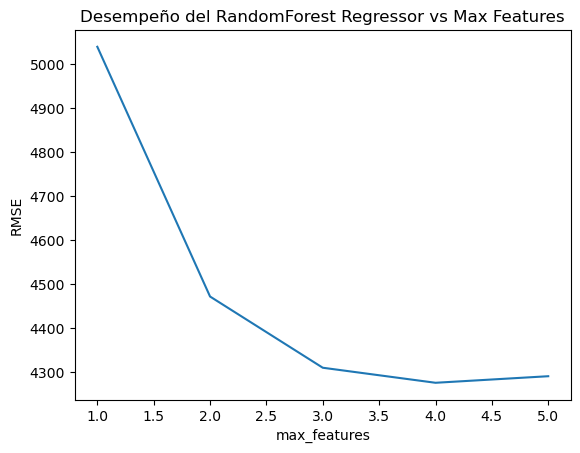

In [13]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, rmse_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE')  # Cambiamos 'MSE' a 'RMSE'
plt.title('Desempeño del RandomForest Regressor vs Max Features')
plt.show()

In [14]:
dict_trees

{'Bagging_features_5_tree': BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8, random_state=123),
                  max_features=5, oob_score=True, random_state=42),
 'Bagging_features_5_RMSE': 6804.144877437177,
 'Bagging_features_1_tree': BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8, random_state=123),
                  max_features=1, oob_score=True, random_state=42),
 'Bagging_features_1_RMSE': 9483.497439872277,
 'Bagging_features_2_tree': BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8, random_state=123),
                  max_features=2, oob_score=True, random_state=42),
 'Bagging_features_2_RMSE': 8009.705113657633,
 'Bagging_features_3_tree': BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8, random_state=123),
                  max_features=3, oob_score=True, random_state=42),
 'Bagging_features_3_RMSE': 7383.934689539348,
 'Bagging_features_4_tree': BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8, random_state=1

In [15]:
estimator_range = range(10, 310, 10)

# Lista para almacenar el Root Mean Squared Error (RMSE) para cada valor de n_estimators
rmse_scores = []

# Uso de 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    rf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-3)
    rf.fit(X_train, y_train)
    # Calcular el RMSE directamente
    rmse_score = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
    rmse_scores.append(rmse_score)
    dict_trees[f'RandomForest_estimator_{round(estimator,1)}_tree']=rf
    dict_trees[f'RandomForest_estimator_{round(estimator,1)}_RMSE']=rmse_score

# Encontrar el valor de n_estimators que minimiza el RMSE
best_estimator = estimator_range[np.argmin(rmse_scores)]
best_rmse = min(rmse_scores)

print(f'Mejor número de estimadores: {best_estimator}')
print(f'RMSE con mejor número de estimadores: {best_rmse}')

: 

In [ ]:
plt.plot(estimator_range, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')  # Cambiamos 'MSE' a 'RMSE'
plt.title('Desempeño del RandomForest Regressor vs Número de Estimadores')
plt.show()

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Creación de lista de valores para iterar sobre diferentes valores de max_depth
depth_range = range(1, 31)  # Probando profundidades desde 1 hasta 30

# Definición de lista para almacenar el Root Mean Squared Error (RMSE) promedio para cada valor de max_depth
rmse_scores_depth = []

# Uso de un 5-fold cross-validation para cada valor de max_depth
for depth in depth_range:
    rf = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=1, n_jobs=-1)
    mse_score_depth = -cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    rmse_score_depth = np.sqrt(mse_score_depth)  # Calculando el RMSE
    rmse_scores_depth.append(rmse_score_depth)

# Encontrar el valor de max_depth que minimiza el RMSE
best_depth = depth_range[np.argmin(rmse_scores_depth)]
best_rmse_depth = min(rmse_scores_depth)

print(f'Mejor profundidad: {best_depth}')
print(f'RMSE con la mejor profundidad: {best_rmse_depth}')

Mejor profundidad: 18
RMSE con la mejor profundidad: 4111.802447875877


In [ ]:
plt.plot(depth_range, rmse_scores_depth)  # Usamos rmse_scores_depth en lugar de mse_scores_depth
plt.xlabel('max_depth')  # Aseguramos que el eje X esté correctamente etiquetado como 'max_depth'
plt.ylabel('RMSE')  # Cambiamos 'MSE' a 'RMSE' porque estamos tratando con RMSE
plt.title('Desempeño del RandomForest Regressor vs Profundidad Máxima de los Árboles')
plt.show()

In [11]:
from sklearn import metrics
import numpy as np
from xgboost import XGBRegressor

In [12]:
xgb = XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Calculo del MSE y el MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("El modelo XGBRegressor tiene un RMSE igual a " +str(rmse)+ " y un MAE igual a "+str(mae))

El modelo XGBRegressor tiene un RMSE igual a 4264.512340973015 y un MAE igual a 2912.751721877127


In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [15]:
learning_rates = np.arange(0, 1.1, 0.1)
# Definición de lista para almacenar el MSE para cada valor de learning rate
MSE = []

# Uso de un 5-fold cross-validation para cada valor
for rate in learning_rates:
    xgb = XGBRegressor(learning_rate=rate, random_state=1)
    MSE.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    MSE= [abs(valor) for valor in MSE]

Text(0, 0.5, 'MSE')

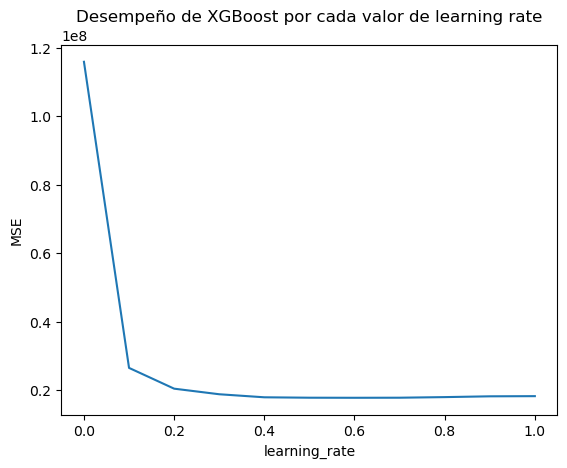

In [16]:
plt.plot(learning_rates, MSE)
plt.title("Desempeño de XGBoost por cada valor de learning rate")
plt.xlabel('learning_rate')
plt.ylabel('MSE')

In [17]:
gamma = np.arange(0, 1000, 100 )
MSE_2 = []
for valor in gamma:
    xgb = XGBRegressor(gamma=valor, random_state=1)
    MSE_2.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    MSE_2 = [abs(valor) for valor in MSE_2]

Text(0, 0.5, 'MSE')

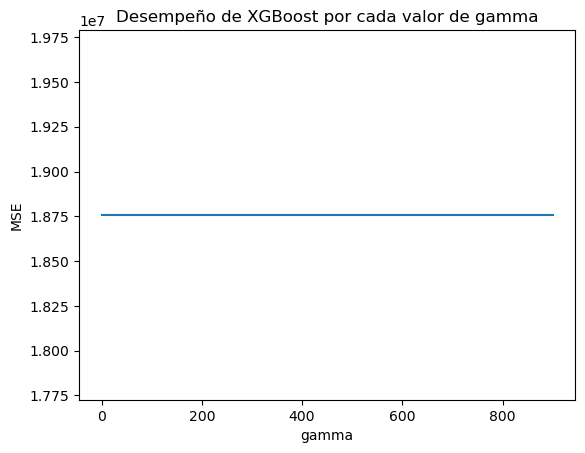

In [18]:
plt.plot(gamma, MSE_2)
plt.title("Desempeño de XGBoost por cada valor de gamma")
plt.xlabel('gamma')
plt.ylabel('MSE')

In [19]:
samples = np.arange(0, 1.1, 0.1)
MSE_3 = []
for sample in samples:
    xgb = XGBRegressor(colsample_bytree=sample, random_state=1)
    MSE_3.append(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    MSE_3 = [abs(valor) for valor in MSE_3]

Text(0, 0.5, 'MSE_3')

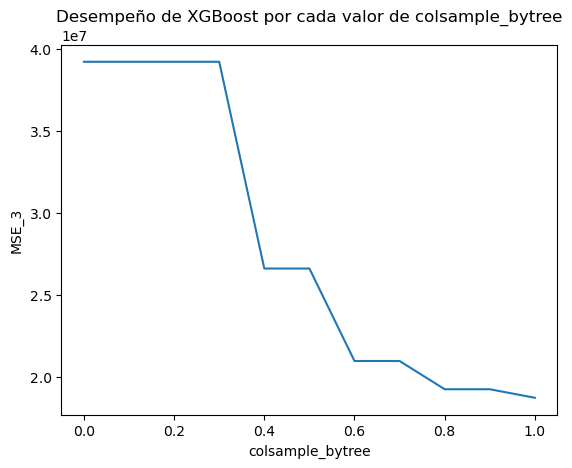

In [20]:
plt.plot(samples, MSE_3)
plt.title("Desempeño de XGBoost por cada valor de colsample_bytree")
plt.xlabel('colsample_bytree')
plt.ylabel('MSE_3')

In [21]:
xgb_calibrado_1 = XGBRegressor(colsample_bytree=0.3, learning_rate = 0.1, gamma = 400, random_state=1)
xgb_calibrado_1.fit(X_train, y_train)
y_pred = xgb_calibrado_1.predict(X_test)
mse_xgb_calibrado_1 = mean_squared_error(y_test, y_pred)
rsmse_xgb_calibrado_1 = np.sqrt(mse_xgb_calibrado_1)
mae_xgb_calibrado_1 = mean_absolute_error(y_test, y_pred)
print("El modelo XGB calibrado tiene un RMSE igual a " +str(rsmse_xgb_calibrado_1)+ " y un MAE igual a "+str(mae_xgb_calibrado_1))

El modelo XGB calibrado tiene un RMSE igual a 6881.99841023215 y un MAE igual a 5050.066078893025


In [22]:
params = {
        'gamma': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
        'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        }

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [24]:
folds = 3
xgb_2 = XGBRegressor(random_state = 1)
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1)
grid = GridSearchCV(estimator=xgb_2, param_grid=params, scoring='neg_mean_squared_error', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3 )
grid.fit(X_train, y_train)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)


Fitting 3 folds for each of 810 candidates, totalling 2430 fits
[CV 1/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.2;, score=-41167445.470 total time=   0.5s
[CV 1/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.1;, score=-47995667.291 total time=   0.5s
[CV 3/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.1;, score=-48527533.070 total time=   0.5s
[CV 2/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.1;, score=-47724400.829 total time=   0.6s
[CV 2/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.2;, score=-40754352.793 total time=   0.6s
[CV 3/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.2;, score=-42674656.199 total time=   0.6s
[CV 1/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.3;, score=-38746315.553 total time=   0.6s
[CV 2/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.3;, score=-37716123.763 total time=   0.6s
[CV 3/3] END colsample_bytree=0.1, gamma=100, learning_rate=0.3;, score=-39978720.013 total time

In [29]:
xgb_calibrado_2 = XGBRegressor(colsample_bytree=0.5, learning_rate = 0.1, gamma = 1000, random_state=1)
xgb_calibrado_2.fit(X_train, y_train)
y_pred = xgb_calibrado_2.predict(X_test)
mse_xgb_calibrado_2 = mean_squared_error(y_test, y_pred)
mae_xgb_calibrado_2 = mean_absolute_error(y_test, y_pred)
rmse_xgb_calibrado_2 = np.sqrt(mse_xgb_calibrado_2)
print("El modelo XGB calibrado usando GreedSearch tiene un RMSE igual a " +str(rmse_xgb_calibrado_2)+ " y un MAE igual a "+str(mae_xgb_calibrado_2))

El modelo XGB calibrado usando GreedSearch tiene un RMSE igual a 5777.742942240127 y un MAE igual a 4151.855192117402


In [26]:
# Visualización datos de test
dataTesting.shape

(100000, 5)

In [27]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [28]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_JC.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033
